## Aligned BED file analysis

In [18]:
import pandas as pd

df = pd.read_csv("../TRAV_homology/TRAV_list.txt", sep = "\n")
gene_names = df["HUGO"].values.tolist()
print(gene_names)

df = pd.read_csv("../TRAV_homology/TRAV_UCSC.tsv", sep = "\t")
gene_IDs = df["#name"].values.tolist()
print(gene_IDs)

['TRAV1-1', 'TRAV1-2', 'TRAV2', 'TRAV3', 'TRAV4', 'TRAV5', 'TRAV6', 'TRAV7', 'TRAV8-1', 'TRAV8-2', 'TRAV8-3', 'TRAV8-4', 'TRAV8-5', 'TRAV8-6', 'TRAV8-7', 'TRAV9-1', 'TRAV9-2', 'TRAV10', 'TRAV11', 'TRAV12-1', 'TRAV12-2', 'TRAV12-3', 'TRAV13-1', 'TRAV13-2', 'TRAV14DV4', 'TRAV15', 'TRAV16', 'TRAV17', 'TRAV18', 'TRAV19', 'TRAV20', 'TRAV21', 'TRAV22', 'TRAV23DV6', 'TRAV24', 'TRAV25', 'TRAV26-1', 'TRAV26-2', 'TRAV27', 'TRAV28', 'TRAV29DV5', 'TRAV30', 'TRAV31', 'TRAV32', 'TRAV33', 'TRAV34', 'TRAV35', 'TRAV36DV7', 'TRAV37', 'TRAV38-1', 'TRAV38-2DV8', 'TRAV39', 'TRAV40', 'TRAV41']
['ENST00000542354.1', 'ENST00000390423.2', 'ENST00000390424.2', 'ENST00000390425.2', 'ENST00000390426.2', 'ENST00000390427.3', 'ENST00000390428.3', 'ENST00000390429.3', 'ENST00000390430.2', 'ENST00000390431.3', 'ENST00000390432.2', 'ENST00000539512.1', 'ENST00000390433.1', 'ENST00000390434.3', 'ENST00000390435.1', 'ENST00000390436.2', 'ENST00000390437.2', 'ENST00000390438.2', 'ENST00000537369.2', 'ENST00000390439.2', 

In [19]:
f = open("genes.gtf", "r")
gtf = f.readlines()
result_list = []

for g in gtf:
    ID_idx = g.find("transcript_id")
    ID_start = ID_idx + g[ID_idx:].find("\"")+1
    ID_end = ID_start + g[ID_start:].find("\"")
    ID = g[ID_start:ID_end]
    start = int(g.split()[3])
    end = int(g.split()[4])
    result_list.append([ID, start, end])
    

In [20]:
pos = [[] for i in range(len(gene_IDs))]
for i in range(len(result_list)):
    for j in range(len(gene_IDs)):
        if result_list[i][0] == gene_IDs[j]:
            pos[j].append((result_list[i][1], result_list[i][2]))

In [21]:
gene_positions = []
positions = df[["exonStarts", "exonEnds"]].values.tolist()
for i in range(len(gene_names)):
    exon_count = len(positions[i][0].split(","))-1
    for j in range(exon_count):
        start = int(positions[i][0].split(",")[j])
        end = int(positions[i][1].split(",")[j])
        gene_positions.append((start,end,i))

#gene_positions = [[] for i in range(len(gene_IDs))]
#positions = df[["exonStarts", "exonEnds"]].values.tolist()
#for i in range(len(gene_positions)):
#    exon_count = len(positions[i][0].split(","))-1
#    for j in range(exon_count):
#        start = int(positions[i][0].split(",")[j])
#        end = int(positions[i][1].split(",")[j])
#        gene_positions[i].append((start,end))
#gene_positions

In [22]:
for i in range(5):
    print(gene_positions[i])
print("...")
for i in range(5,0,-1):
    print(gene_positions[len(gene_positions)-i])

(21621837, 21621946, 0)
(21622284, 21622567, 0)
(21642888, 21643015, 1)
(21643303, 21643578, 1)
(21712320, 21712394, 2)
...
(22304265, 22304553, 51)
(22314489, 22314532, 52)
(22314645, 22314919, 52)
(22320187, 22320239, 53)
(22320407, 22320691, 53)


In [23]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,#name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,proteinID,alignID
0,0,0,0,0,0,ENST00000542354.1,chr14,+,21621837,21622567,21621903,21622567,2,"21621837,21622284,","21621946,21622567,",A0A0B4J248,uc058zdj.1
1,1,1,1,1,1,ENST00000390423.2,chr14,+,21642888,21643578,21642972,21643578,2,"21642888,21643303,","21643015,21643578,",A0A0B4J238,uc058zdk.1
2,2,2,2,2,2,ENST00000390424.2,chr14,+,21712320,21712843,21712330,21712843,2,"21712320,21712569,","21712394,21712843,",A0A0B4J234,uc021roz.2
3,3,3,3,3,3,ENST00000390425.2,chr14,+,21723712,21724321,21723888,21724321,2,"21723712,21724024,","21723934,21724321,",A0A0B4J244,uc001wbn.5
4,4,4,4,4,4,ENST00000390426.2,chr14,+,21736151,21736982,21736218,21736982,2,"21736151,21736694,","21736258,21736982,",A0A0B4J268,uc001wbp.4
5,5,5,5,5,5,ENST00000390427.3,chr14,+,21749177,21749705,21749189,21749705,2,"21749177,21749417,","21749241,21749705,",A0A0B4J249,uc058zdm.1
6,6,6,6,6,6,ENST00000390428.3,chr14,+,21768488,21769080,21768495,21769080,2,"21768488,21768792,","21768604,21769080,",A0A075B6T7,uc001wbt.2
7,7,7,7,7,7,ENST00000390429.3,chr14,+,21782992,21783503,21782992,21783503,2,"21782992,21783218,","21783044,21783503,",A0A075B6U4,uc058zdo.1
8,8,8,8,8,8,ENST00000390430.2,chr14,+,21797286,21797886,21797418,21797886,2,"21797286,21797591,","21797464,21797886,",A0A0A6YYK1,uc058zdp.1
9,9,9,9,9,9,ENST00000390431.3,chr14,+,21811501,21811977,21811501,21811977,2,"21811501,21811685,","21811547,21811977,",A0A075B6T8,uc001wbv.4


## TRAV Read Count Analysis

In [24]:
f = open("aln_TRA.bed", "r")
lines = f.readlines()
f.close()
read_positions = []
scores = []
CROM = 18200001 # position of the start of chromosome 14.

for l in lines:
    chrom_start = int(l.split()[1])
    chrom_end = int(l.split()[2])
    score = int(l.split()[4])
    read_positions.append((chrom_start+CROM, chrom_end+CROM, score))
    read_positions.append((chrom_start+CROM, chrom_end+CROM, score))
    scores.append(score)

In [25]:
for i in range(5):
    print(lines[i].split("\t")[3],":", read_positions[i][1]-read_positions[i][0])
print("...")
for i in range(len(lines)-4,len(lines)):
    print(lines[i].split("\t")[3],":", read_positions[i][1]-read_positions[i][0])

SRR8619000.1/2 : 50
SRR8619000.2/1 : 50
SRR8619000.2/2 : 71
SRR8619000.829/2 : 71
SRR8619000.1266/2 : 50
...
SRR8619000.34542588/1 : 76
SRR8619000.34542588/2 : 76
SRR8619000.34542750/2 : 76
SRR8619000.34542925/1 : 76


In [26]:
print("total reads :", len(scores))
print("max :", max(scores))
print("mean :",sum(scores)/len(scores))

cnt = 0
for score in scores:
    if score >= 20:
        cnt += 1
print("over_20 :", cnt)

total reads : 1251799
max : 60
mean : 29.118090044807513
over_20 : 668793


In [27]:
read_positions.sort(reverse = True, key = lambda x : x[2])

for i in range(6):
    print(read_positions[i])

over20_list = []
for position in read_positions:
    if position[2] < 20:
        break
    over20_list.append(position[0])
print("min :", min(over20_list))
print("max :",max(over20_list))


(19847525, 19847556, 60)
(19847525, 19847556, 60)
(19847522, 19847555, 60)
(19847522, 19847555, 60)
(22568762, 22568792, 60)
(22568762, 22568792, 60)
min : 18208318
max : 24099982


In [28]:
ALN_RATE = 0.2
read_count = [0]*len(gene_names)

for i in range(len(read_positions)):
    for j in range(len(gene_positions)):
        read_start = read_positions[i][0]
        read_end = read_positions[i][1]
        gene_start = gene_positions[j][0]
        gene_end = gene_positions[j][1]
        
        if (read_start >= gene_start and read_start <= gene_end) or (read_end >= gene_start and read_end <= gene_end):
            overlap = min(read_end, gene_end)-max(read_start, gene_start)
            if overlap >= (gene_end-gene_start)*ALN_RATE:
                read_count[gene_positions[j][2]] += 1

<BarContainer object of 54 artists>

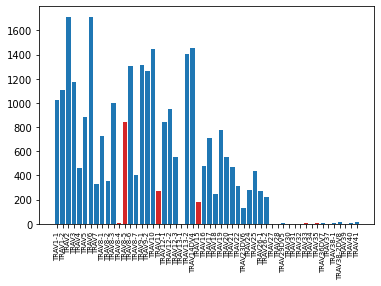

In [29]:
import matplotlib.pyplot as plt
plt.xticks(rotation=90, fontsize = 7)
untargeted = [11, 12, 18, 22, 25, 39, 42, 43, 44, 46, 48] # added later, from "untargeted genes"
colors = ["tab:red" if i in untargeted else "tab:blue" for i in range(len(read_count))] 
plt.bar(gene_names, read_count, color=colors)

## TRA Read Recalibration with BED file

In [31]:
f = open("aln_TRA.bed", "r")
lines = f.readlines()
f.close()
read_positions = []
scores = []
CROM = 18200001 # position of the start of chromosome 14.

for l in lines:
    chrom_start = int(l.split()[1])
    chrom_end = int(l.split()[2])
    score = int(l.split()[4])
    read_positions.append((chrom_start+CROM, chrom_end+CROM, score))
    read_positions.append((chrom_start+CROM, chrom_end+CROM, score))
    scores.append(score)

In [32]:
f = open("hg38_Twist_ILMN_Exome_2.0_Plus_Panel_annotated_chr14.bed", "r")
bed14 = f.readlines()
f.close()
targets = []
for b in bed14:
    if "TRAV" in b.split("\t")[3]:
        if "TRAV" in b.split("\t")[3].split(",")[0]:
            targets.append((int(b.split("\t")[1]),int(b.split("\t")[2]),b.split("\t")[3].split(",")[0]))
        else:
            targets.append((int(b.split("\t")[1]),int(b.split("\t")[2]),b.split("\t")[3].split(",")[1]))

In [33]:
for i in range(5):
    print(targets[i])
print("...")
for i in range(5,0,-1):
    print(targets[len(targets)-i])

(21621903, 21621946, 'TRAV1-1')
(21622284, 21622567, 'TRAV1-1')
(21642972, 21643015, 'TRAV1-2')
(21643303, 21643578, 'TRAV1-2')
(21712330, 21712394, 'TRAV2')
...
(22304265, 22304553, 'TRAV39')
(22314489, 22314532, 'TRAV40')
(22314645, 22314919, 'TRAV40')
(22320187, 22320239, 'TRAV41')
(22320407, 22320691, 'TRAV41')


In [34]:
temp = [targets[i][2] for i in range(len(targets))]
targeted_gene_names = list(dict.fromkeys(temp))
untargeted_gene_indexes = []

print("targeted genes:")
for i in range(5):
    print(targeted_gene_names[i])
print("...")
for i in range(5,0,-1):
    print(targeted_gene_names[len(targeted_gene_names)-i])

print("\nuntargeted genes:")
for i in range(len(gene_names)):
    if gene_names[i] not in targeted_gene_names:
        if i not in untargeted_gene_indexes:
            untargeted_gene_indexes.append(i)
        print(gene_names[i])

targeted genes:
TRAV1-1
TRAV1-2
TRAV2
TRAV3
TRAV4
...
TRAV38-1
TRAV38-2DV8
TRAV39
TRAV40
TRAV41

untargeted genes:
TRAV8-4
TRAV8-5
TRAV11
TRAV13-1
TRAV15
TRAV28
TRAV31
TRAV32
TRAV33
TRAV35
TRAV37


In [36]:
ALN_RATE = 0.2
read_count = [0]*len(gene_names)

for i in range(len(read_positions)):
    for j in range(len(gene_positions)):
        read_start = read_positions[i][0]
        read_end = read_positions[i][1]
        gene_start = gene_positions[j][0]
        gene_end = gene_positions[j][1]
        
        if (read_start >= gene_start and read_start <= gene_end) or (read_end >= gene_start and read_end <= gene_end):
            overlap = min(read_end, gene_end)-max(read_start, gene_start)
            if overlap >= (gene_end-gene_start)*ALN_RATE:
                read_count[gene_positions[j][2]] += 1

In [37]:
for index in sorted(untargeted_gene_indexes, reverse=True):
    del read_count[index]

<BarContainer object of 43 artists>

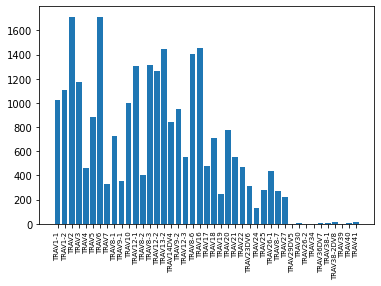

In [38]:
import matplotlib.pyplot as plt
plt.xticks(rotation=90, fontsize = 7)
plt.bar(targeted_gene_names, read_count)

In [39]:
f = open("aln_TRA.bed", "r")
tra_bed = f.readlines()
positions = []
CROM_START = 18200001

for tra in tra_bed:
    chrom_start = int(tra.split()[1])
    chrom_end = int(tra.split()[2])
    positions.append((chrom_start+CROM_START, chrom_end+CROM_START))

In [40]:
read_count_dict = {}
for target in targets:
    if target[2] not in read_count_dict:
        read_count_dict[target[2]] = 0

In [41]:
for position in positions:
    for target in targets:
        if (position[1] > target[0] and position[0] < target[0]) or (position[1] > target[1] and position[0] < target[1]):
            read_count_dict[target[2]] += 1
            break

In [42]:
count_list = list(read_count_dict.values())

<BarContainer object of 43 artists>

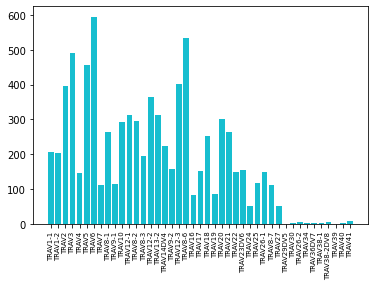

In [43]:
import matplotlib.pyplot as plt
names = list(read_count_dict.keys())
plt.xticks(rotation=90, fontsize = 7)
plt.bar(targeted_gene_names, count_list, color="tab:cyan")
